# Climate Data Neural Network Analysis

## Contents
### Data Cleaning
### Feedforward Neural Network Analysis
### Convolution Neural Network Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
pleasant = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\Scaled pleasant data without Dates.csv')

In [3]:
climate = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\Scaled Climate Data.csv')

In [4]:
pleasant.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
climate.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,Date,Month
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,19600101,1
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,19600102,1
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,19600103,1
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511,19600104,1
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186,19600105,1


In [6]:
pleasant.shape

(22950, 15)

In [7]:
climate.shape

(22950, 170)

### Data Cleaning

In [8]:
# drop climate data for GDANSK, ROMA, and TOURS, and drop date columns
locations_to_drop = ['GDANSK', 'ROMA', 'TOURS']

# Drop columns that have any of these location names in their header
climate.drop([col for col in climate.columns if any(loc in col for loc in locations_to_drop)], axis=1, inplace=True)

climate.drop(['Date', 'Month'], axis = 1, inplace = True)
climate.shape


(22950, 147)

In [9]:
climate.columns.tolist()

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [10]:
# check for null values
climate[climate.isna().any(axis = 1)]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max


In [11]:
# check for missing values
climate.count().tolist()

[22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,
 22950,


In [12]:
# check for '0' values
rows_with_any_zero = climate[(climate == 0).any(axis=1)]
rows_with_any_zero

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max


In [13]:
# check variables provided for each location
# Variables to look for in column names
variables = ['cloud_cover', 'wind_speed', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'snow_depth', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']

# Count columns that include any of the specified variables
column_count = {var: sum(var in col for col in climate.columns) for var in variables}
column_count


{'cloud_cover': 14,
 'wind_speed': 9,
 'humidity': 14,
 'pressure': 14,
 'global_radiation': 15,
 'precipitation': 15,
 'snow_depth': 6,
 'sunshine': 15,
 'temp_mean': 15,
 'temp_min': 15,
 'temp_max': 15}

In [14]:
# drop wind speed and snow depth variables
variables_to_drop = ['snow_depth', 'wind_speed']

climate.drop([col for col in climate.columns if any(loc in col for loc in variables_to_drop)], axis=1, inplace=True)

climate.shape


(22950, 132)

In [15]:
# Fill missing climate variables

climate['KASSEL_cloud_cover'] = climate['LJUBLJANA_cloud_cover']
climate['MUNCHENB_pressure'] = climate['SONNBLICK_pressure']
climate['STOCKHOLM_humidity'] = climate['OSLO_humidity']

climate.shape

(22950, 135)

In [16]:
# resort index to put new columns in correct place
climate = climate.sort_index(axis=1)
climate.head()

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,...,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
0,0.660514,-1.101066,0.826097,-0.265148,-0.001949,-0.902918,-0.478356,-0.528623,-0.845652,-1.206433,...,-0.290439,-0.443701,-0.806427,0.761754,-0.088407,-1.299744,0.372147,-0.752237,-0.668215,-0.519743
1,0.244897,-1.058108,0.735760,1.658760,-0.001949,-0.810126,-0.569988,-0.582946,-0.462450,0.652846,...,-0.183610,0.783085,-1.042055,1.183580,0.503361,-1.262455,-0.829285,-0.407141,-0.548046,-0.629054
2,1.076130,-1.251420,1.277781,0.155707,-0.001949,-1.065304,-0.592896,-0.257010,-0.186545,0.652846,...,-0.410621,0.783085,-1.136306,1.183580,-0.396127,-0.432779,-1.009500,-0.177078,-0.067372,0.054135
3,-1.001953,-0.821838,1.458455,-0.445514,-0.001949,-0.114186,-0.512718,-0.555784,-0.385810,1.396557,...,-0.530804,0.783085,-1.183432,0.480538,0.669056,0.387574,-1.039536,-0.838511,-0.998679,-0.164486
4,0.244897,-0.746661,1.729466,-0.164944,-0.001949,0.187388,-1.039603,-1.003946,-1.075573,1.396557,...,-0.477389,-1.670486,-0.794645,-0.363113,-0.490810,1.729970,0.672505,-1.471186,-1.509396,-1.339569


In [18]:
climate.to_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\'Cleaned Scaled Climate Data.csv')

### Feedforward Neural Network Analysis

In [17]:
# create arrays for FNN analysis
X = np.array(climate).reshape(-1, 15, 9)
y = np.array(pleasant).reshape(-1, 15)
print(X.shape)
print(y.shape)

(22950, 15, 9)
(22950, 15)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18360, 15, 9)
(4590, 15, 9)
(18360, 15)
(4590, 15)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [21]:
# Create and compile the FNN network
epochs = 20
batch_size = 60

# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(15, 9)),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

#compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


C:\Users\kacie\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# fit the model
history = model.fit(X_train, 
          y_train, 
          epochs=epochs, 
          batch_size=batch_size,
          validation_data=(X_test, y_test))

Epoch 1/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8480 - loss: 0.3342 - val_accuracy: 0.9163 - val_loss: 0.1967
Epoch 2/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9107 - loss: 0.2067 - val_accuracy: 0.9271 - val_loss: 0.1734
Epoch 3/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9235 - loss: 0.1828 - val_accuracy: 0.9333 - val_loss: 0.1569
Epoch 4/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9291 - loss: 0.1682 - val_accuracy: 0.9386 - val_loss: 0.1443
Epoch 5/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9337 - loss: 0.1568 - val_accuracy: 0.9420 - val_loss: 0.1362
Epoch 6/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9357 - loss: 0.1500 - val_accuracy: 0.9433 - val_loss: 0.1325
Epoch 7/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9390 - loss: 0.1426 - val_accuracy: 0.9444 - val_loss: 0.1285
Epoch 8/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9400 - loss: 0.1396 - val_accuracy: 0.

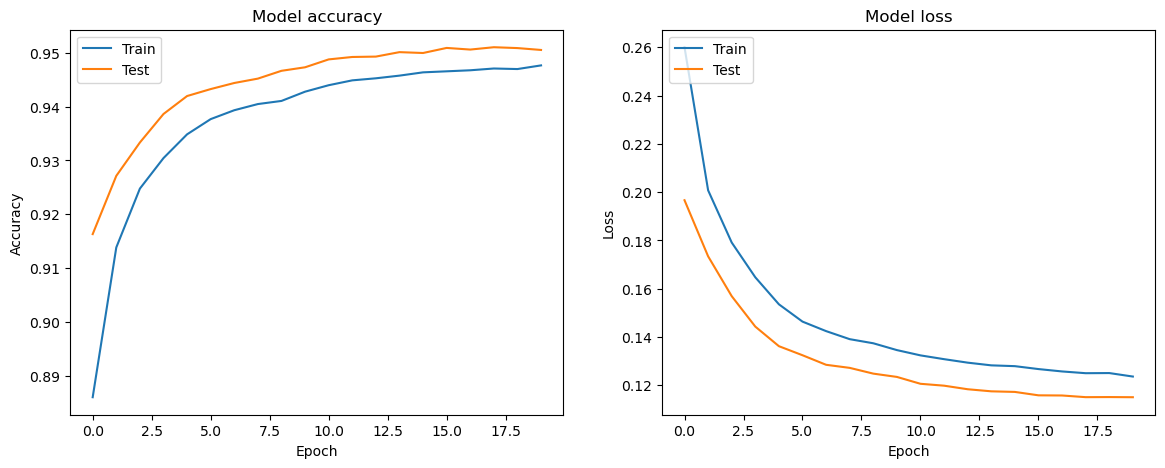

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
# create predicted y values array
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)


144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [26]:
print(y_test.shape)
print(y_pred.shape)

(4590, 15)
(4590, 15, 1)


In [27]:
# reshape the arryas
y_pred = y_pred.reshape(4590, 15)
y_test = y_test.reshape(4590, 15)

In [28]:
pleasant.columns.tolist()

['BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

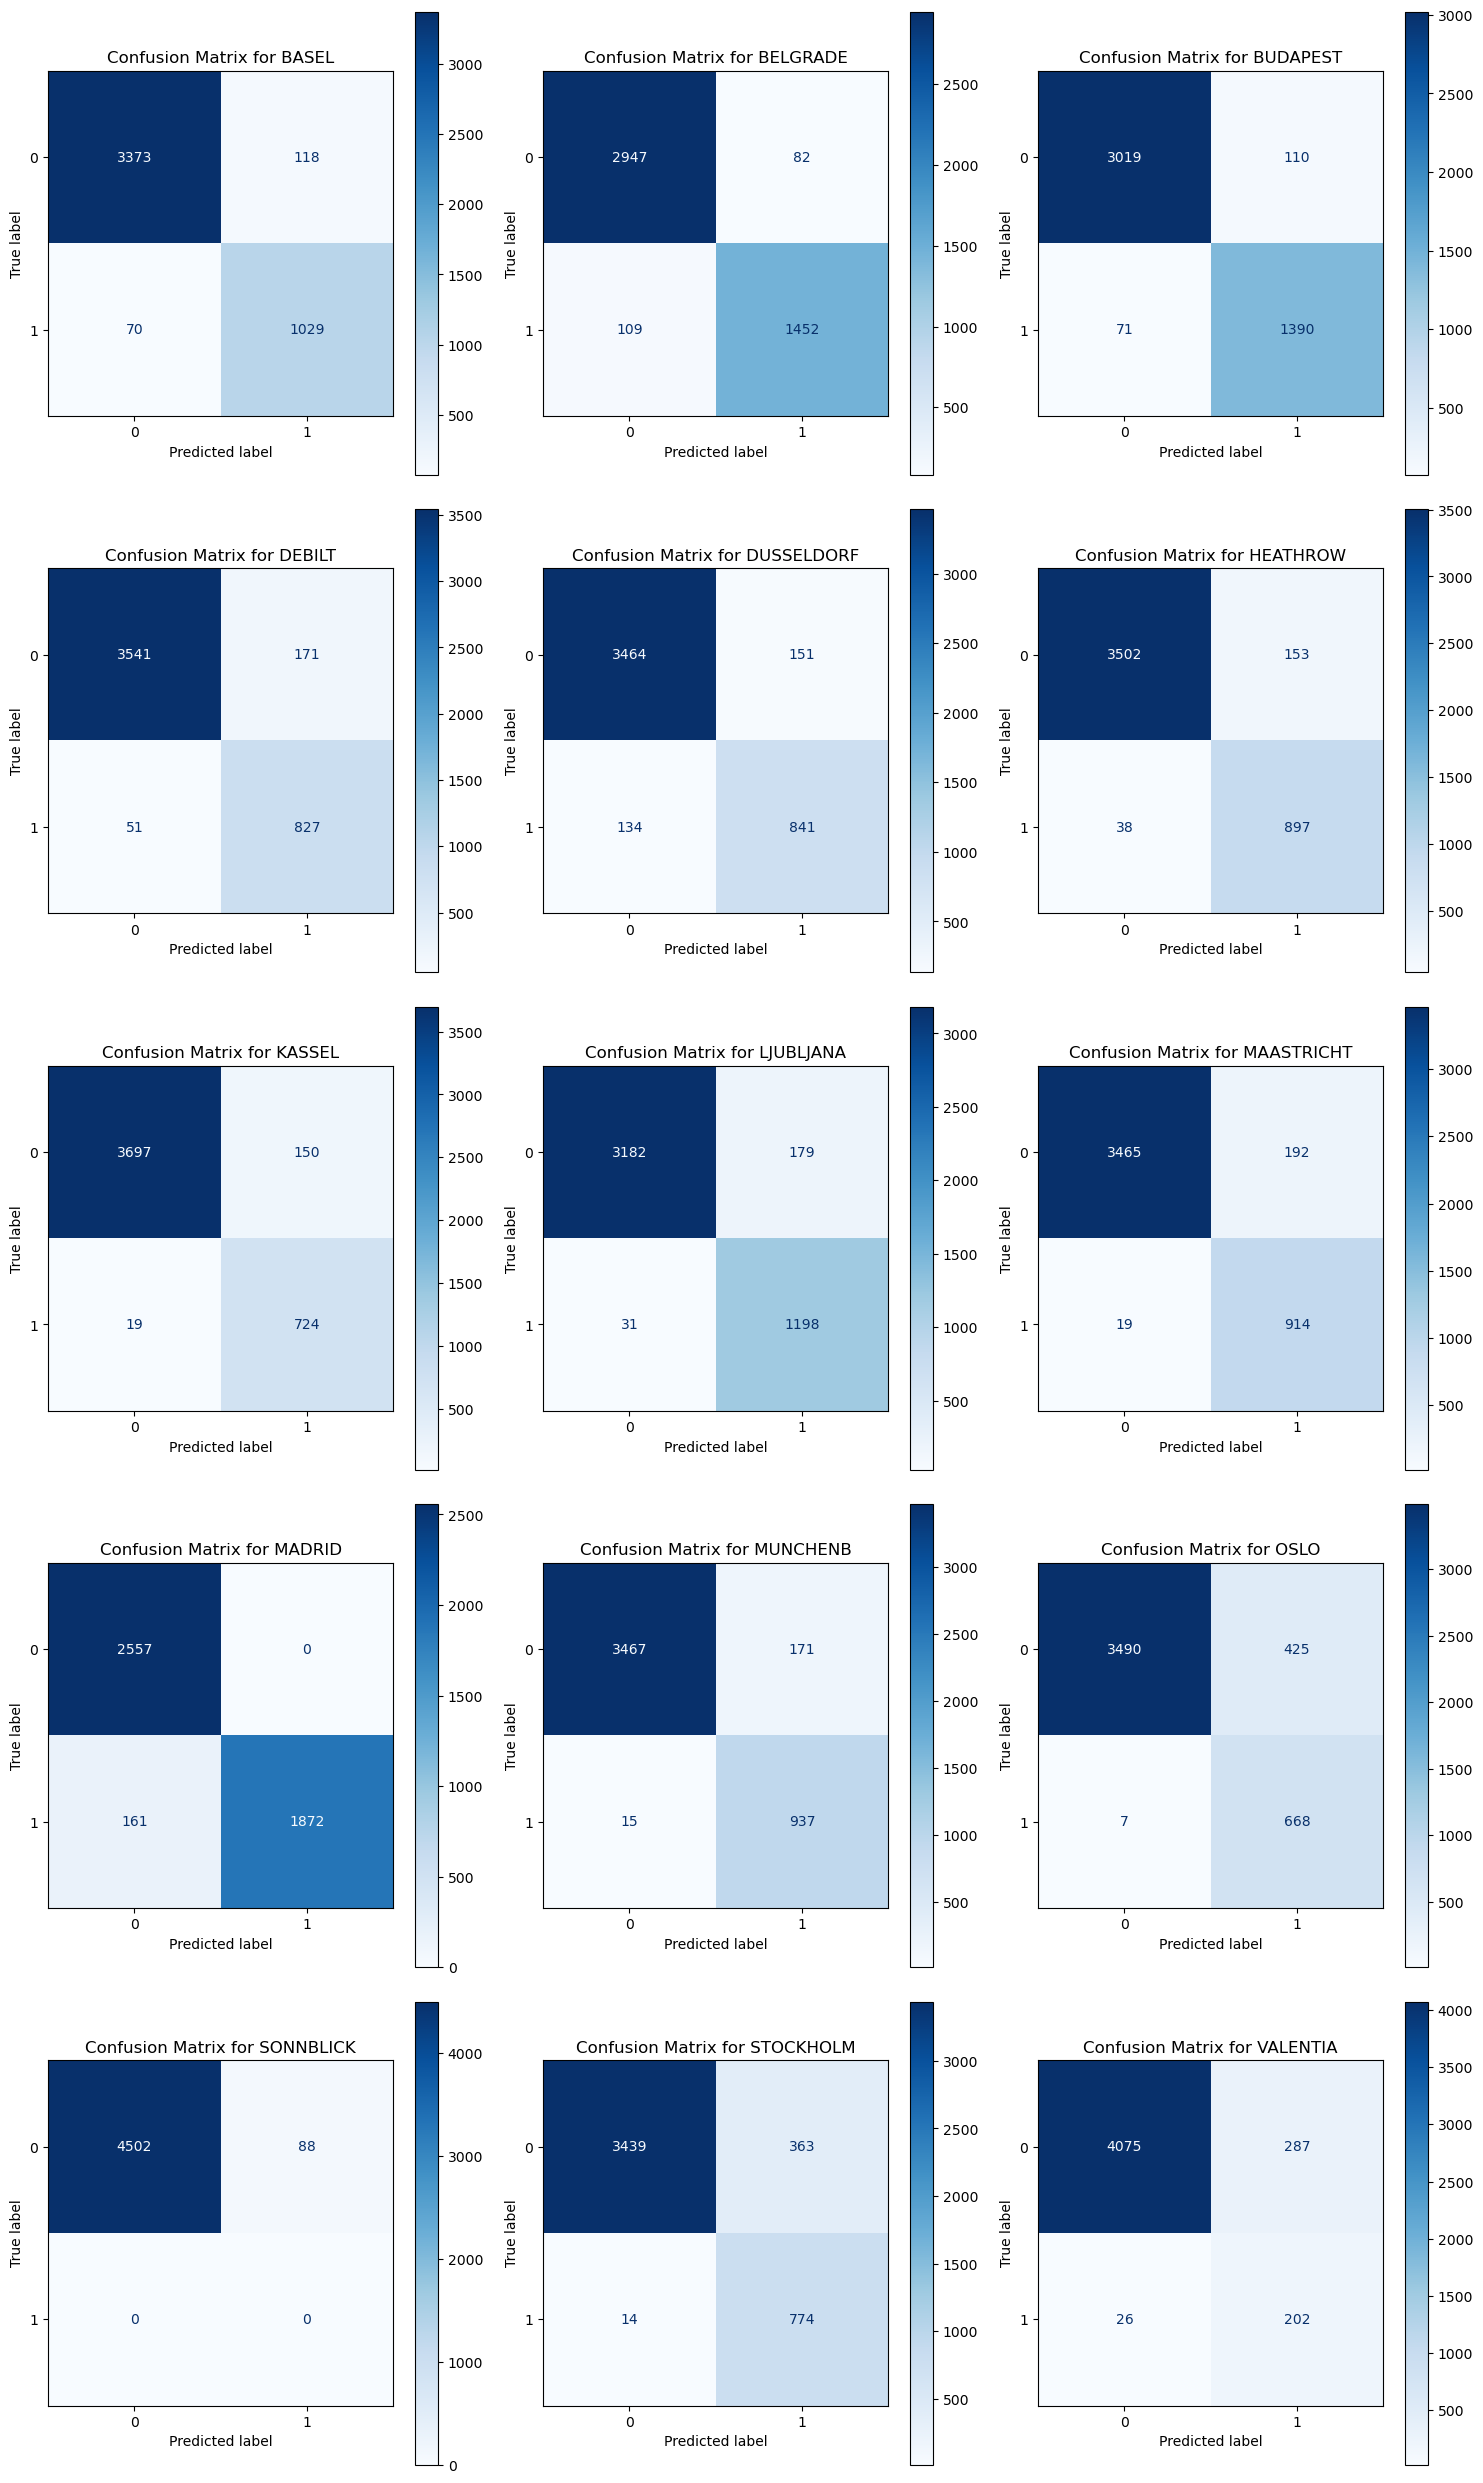

In [29]:
# create confusion matrix for FNN Analysis
labels = ['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

# Create and plot confusion matrices for each of the 15 binary classifiers
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
axes = axes.flatten()

for i in range(15):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])


    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    
    axes[i].title.set_text(f'Confusion Matrix for {labels[i]}')

plt.tight_layout()
plt.show()


In [30]:
# flatten the arrays
y_pred = y_pred.flatten()
y_test = y_test.flatten()

In [31]:
print(y_test.shape)
print(y_pred.shape)

(68850,)
(68850,)


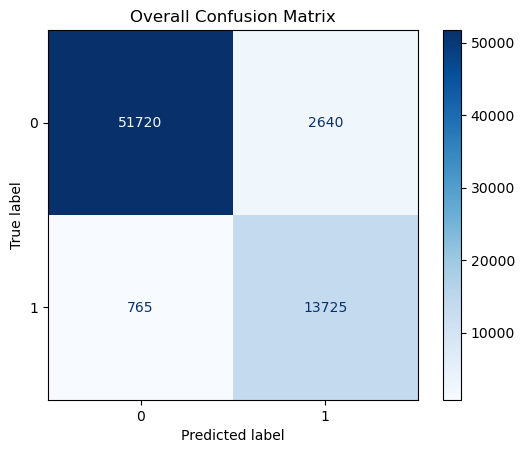

In [32]:
# create overall confusion matrix for FNN analysis
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Overall Confusion Matrix')
plt.show()

### Feedforward Neural Network Analysis

In [34]:
# create X and y arrays for analysis
X = np.array(climate).reshape(-1, 15, 9)
y = np.array(pleasant).reshape(-1, 15)
print(X.shape)
print(y.shape)

(22950, 15, 9)
(22950, 15)


In [35]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18360, 15, 9)
(4590, 15, 9)
(18360, 15)
(4590, 15)


In [36]:
y_train2 = np.argmax(y_train, axis = 1)
y_test2 = np.argmax(y_test, axis = 1)

print(y_train2.shape)
print(y_test2.shape)

(18360,)
(4590,)


In [37]:
from sklearn.utils.multiclass import type_of_target

In [38]:
print(type_of_target(y_train2))
print(type_of_target(y_test2))

multiclass
multiclass


In [39]:
import time
import tensorflow as tf
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from sklearn.metrics import make_scorer, accuracy_score
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dense, Dropout, Input

In [40]:
print(X_train.shape)
print(y_train.shape)

(18360, 15, 9)
(18360, 15)


In [41]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
timesteps

15

In [42]:
score_acc = make_scorer(accuracy_score)
def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs,
             layers1, layers2, normalization, dropout, dropout_rate): 
    optimizer_list = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
    optimizer_dict= {'Adam': Adam(learning_rate=learning_rate), 'SGD': SGD(learning_rate=learning_rate),
                     'RMSprop': RMSprop(learning_rate=learning_rate), 'Adadelta': Adadelta(learning_rate=learning_rate),
                     'Adagrad': Adagrad(learning_rate=learning_rate), 'Adamax': Adamax(learning_rate=learning_rate),
                     'Nadam': Nadam(learning_rate=learning_rate), 'Ftrl': Ftrl(learning_rate=learning_rate)}
    activation_list = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                       'elu', 'exponential', LeakyReLU,'relu']

    # Round the hyperparameters to appropriate values
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activation_list[round(activation)]
    optimizer = optimizer_dict[optimizer_list[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    def cnn_model():
        model = Sequential()
        # Initial Conv1D layer
        model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(15, 9)))
        
        # Optional BatchNormalization
        if normalization > 0.5:
            model.add(BatchNormalization())
        
        # Dense layers1
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation))
        
        # Optional Dropout
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=123))
        
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        
        # MaxPooling1D and Flatten
        model.add(MaxPooling1D())
        model.add(Flatten())
        
        # Output layer
        model.add(Dense(15, activation='softmax')) #n_classes = 15, sigmoid, softmax
        
        # Compile the model
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #binary, sparse_categorical_crossentropy
        return model
    
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=5) # patience=20
    nn = KerasClassifier(build_fn=cnn_model, epochs=epochs, batch_size=batch_size, verbose=2)
    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=123) #n_splits=3 or 5
    score = cross_val_score(nn, X_train, y_train2, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}, n_jobs=-2).mean() #n_jobs=-2
    return score


In [43]:
start = time.time()
params ={
    'neurons': (32, 256),
    'kernel': (1, 5),
    'activation':(0, 8), # set range
    'optimizer':(0, 7), # set range
    'learning_rate':(0.005, .5),
    'batch_size': (16, 128), 
    'epochs':(10, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1), # binary choice
    'dropout':(0,1), # binary choice
    'dropout_rate':(0, 0.5)
}
# Run Bayesian Optimization
nn_opt = BayesianOptimization(bay_area, params, random_state=42)
nn_opt.maximize(init_points=5, n_iter=4) #init_points=15, increase n_iter
print('Search took %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  kernel   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


| 1         | 0.7141    | 2.996     | 122.5     | 0.732     | 0.2993    | 24.04     | 1.624     | 1.116     | 2.732     | 0.3026    | 190.6     | 0.02058   | 6.789     |


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


| 2         | 0.6433    | 6.66      | 39.78     | 0.1818    | 0.0917    | 37.38     | 3.099     | 1.864     | 1.582     | 0.3079    | 63.25     | 0.2921    | 2.565     |


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


| 3         | 0.656     | 3.649     | 103.9     | 0.1997    | 0.2571    | 63.32     | 1.186     | 2.215     | 1.341     | 0.0372    | 244.6     | 0.9656    | 5.659     |


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


| 4         | 0.8637    | 2.437     | 26.94     | 0.6842    | 0.2201    | 20.98     | 2.981     | 1.069     | 2.819     | 0.1331    | 180.4     | 0.3117    | 3.64      |


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


| 5         | nan       | 4.374     | 36.7      | 0.9696    | 0.3876    | 94.55     | 4.579     | 2.196     | 2.844     | 0.0488    | 75.9      | 0.04523   | 2.277     |


ValueError: Input y contains NaN.

In [44]:
optimum = nn_opt.max['params']
learning_rate = optimum['learning_rate']
activation_list = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                       'elu', 'exponential', LeakyReLU,'relu']
optimum['activation'] = activation_list[round(optimum['activation'])]
optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])
optimizer_list = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizer_dict= {'Adam': Adam(learning_rate=learning_rate), 'SGD': SGD(learning_rate=learning_rate),
                     'RMSprop': RMSprop(learning_rate=learning_rate), 'Adadelta': Adadelta(learning_rate=learning_rate),
                     'Adagrad': Adagrad(learning_rate=learning_rate), 'Adamax': Adamax(learning_rate=learning_rate),
                     'Nadam': Nadam(learning_rate=learning_rate), 'Ftrl': Ftrl(learning_rate=learning_rate)}
optimum['optimizer'] = optimizer_dict[optimizer_list[round(optimum['optimizer'])]]
optimum

{'activation': 'tanh',
 'batch_size': 37,
 'dropout': 0.9695846277645586,
 'dropout_rate': 0.3875664116805573,
 'epochs': 95,
 'kernel': 4.579309401710596,
 'layers1': 2,
 'layers2': 3,
 'learning_rate': 0.04880378851570015,
 'neurons': 76,
 'normalization': 0.045227288910538066,
 'optimizer': <keras.src.optimizers.rmsprop.RMSprop at 0x1bb8d11a490>}

In [45]:
epochs = 95
batch_size = 37
n_classes = 15
learning_rate=0.04880378851570015
timesteps = 15
input_dim = 9
layers1 = 2
layers2 = 3
activation = 'tanh'
kernel = 5
neurons = 76
normalization = 0.045227288910538066
dropout = 0.9695846277645586
dropout_rate = 0.3875664116805573
optimizer = 'RMSprop'

model = Sequential()
model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))
if normalization > 0.5:
    model.add(BatchNormalization())
for i in range(layers1):
    model.add(Dense(neurons, activation=activation))
if dropout > 0.5:
    model.add(Dropout(dropout_rate, seed=123))
for i in range(layers2):
    model.add(Dense(neurons, activation=activation))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) #softmax sigmoid
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #binary_crossentropy

C:\Users\kacie\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
history = model.fit(X_train, y_train2, validation_data=(X_test, y_test2), batch_size=batch_size, epochs=epochs)

Epoch 1/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 1.0022 - val_accuracy: 0.7821 - val_loss: 0.6347
Epoch 2/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7827 - loss: 0.6295 - val_accuracy: 0.8113 - val_loss: 0.5325
Epoch 3/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8036 - loss: 0.5448 - val_accuracy: 0.8135 - val_loss: 0.5460
Epoch 4/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8317 - loss: 0.4823 - val_accuracy: 0.8375 - val_loss: 0.4894
Epoch 5/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8457 - loss: 0.4465 - val_accuracy: 0.8551 - val_loss: 0.4226
Epoch 6/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8602 - loss: 0.4068 - val_accuracy: 0.8603 - val_loss: 0.4000
Epoch 7/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8629 - loss: 0.3829 - val_accuracy: 0.8599 - val_loss: 0.4122
Epoch 8/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8709 - loss: 0.3651 - val_accuracy: 0

497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9557 - loss: 0.1305 - val_accuracy: 0.9285 - val_loss: 0.2567
Epoch 52/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9596 - loss: 0.1180 - val_accuracy: 0.9205 - val_loss: 0.2600
Epoch 53/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9577 - loss: 0.1249 - val_accuracy: 0.9157 - val_loss: 0.3173
Epoch 54/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9577 - loss: 0.1251 - val_accuracy: 0.9268 - val_loss: 0.2411
Epoch 55/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9625 - loss: 0.1095 - val_accuracy: 0.9288 - val_loss: 0.2513
Epoch 56/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9589 - loss: 0.1120 - val_accuracy: 0.9224 - val_loss: 0.2646
Epoch 57/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9608 - loss: 0.1104 - val_accuracy: 0.7858 - val_loss: 0.7597
Epoch 58/95
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9623 - loss: 0.1081 - val_accuracy: 0.9301

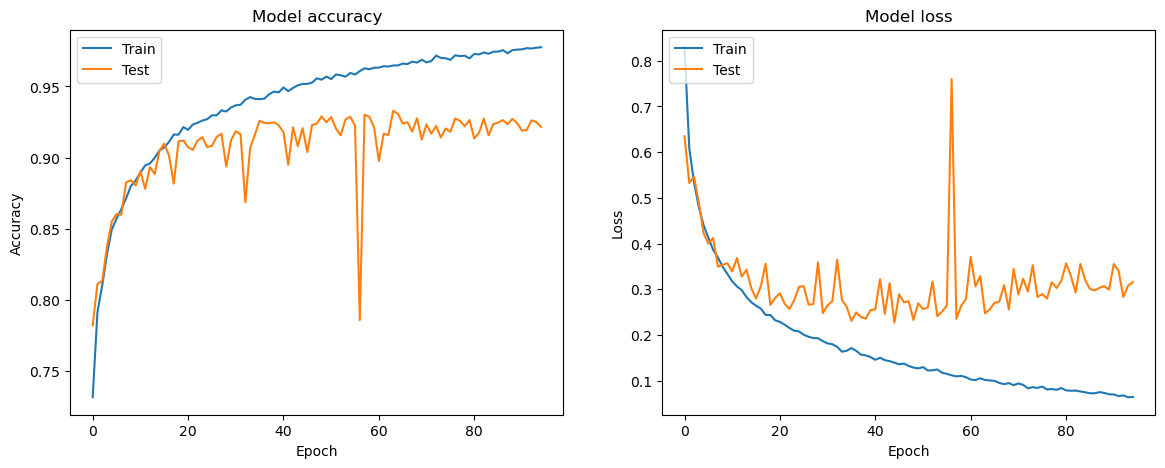

In [47]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [48]:
# adjust the model by limiting to 20 epochs
epochs = 20
batch_size = 37
n_classes = 15
learning_rate = .04880
timesteps = 15
input_dim = 9
layers1 = 2
layers2 = 3
activation = 'tanh'
kernel = 5
neurons = 76
normalization = 0.045227289
dropout = 0.96958
dropout_rate = 0.387566
optimizer = 'RMSprop'

model = Sequential()
model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))
if normalization > 0.5:
    model.add(BatchNormalization())
for i in range(layers1):
    model.add(Dense(neurons, activation=activation))
if dropout > 0.5:
    model.add(Dropout(dropout_rate, seed=123))
for i in range(layers2):
    model.add(Dense(neurons, activation=activation))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) #softmax sigmoid
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #binary_crossentropy

In [49]:
history = model.fit(X_train, y_train2, validation_data=(X_test, y_test2), batch_size=batch_size, epochs=epochs)

Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6887 - loss: 0.9914 - val_accuracy: 0.7673 - val_loss: 0.6816
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7821 - loss: 0.6281 - val_accuracy: 0.8050 - val_loss: 0.5454
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8027 - loss: 0.5549 - val_accuracy: 0.8126 - val_loss: 0.5168
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8252 - loss: 0.4966 - val_accuracy: 0.8403 - val_loss: 0.4666
Epoch 5/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8410 - loss: 0.4584 - val_accuracy: 0.8481 - val_loss: 0.4258
Epoch 6/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8521 - loss: 0.4188 - val_accuracy: 0.8617 - val_loss: 0.3924
Epoch 7/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8582 - loss: 0.4030 - val_accuracy: 0.8451 - val_loss: 0.4595
Epoch 8/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8658 - loss: 0.3833 - val_accuracy: 0.

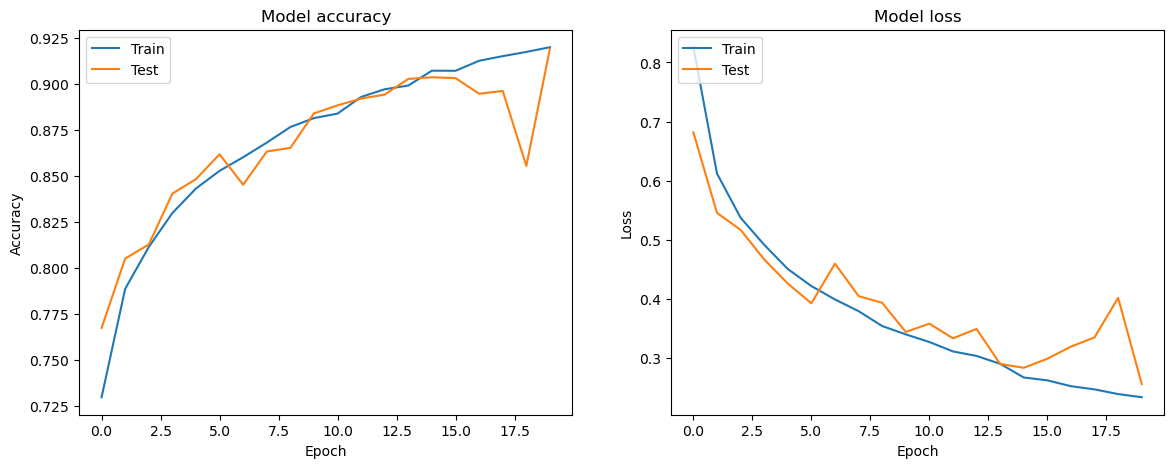

In [50]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [51]:
# create predicted y values array
y_pred_labels = model.predict(X_test)
y_pred_labels.shape

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(4590, 15)

In [52]:
y_pred_labels

array([[8.0649495e-01, 2.9474197e-02, 7.0804940e-04, ..., 1.6144771e-04,
        9.5711905e-04, 2.8318530e-03],
       [9.9371767e-01, 2.8681770e-05, 2.8278550e-05, ..., 4.5252557e-07,
        1.3132932e-06, 3.2483240e-06],
       [9.9433160e-01, 3.7821042e-03, 7.7800814e-04, ..., 3.1987277e-06,
        6.2693130e-06, 3.0179108e-06],
       ...,
       [9.9869007e-01, 7.9013389e-06, 2.6909896e-05, ..., 5.4832299e-07,
        3.3819701e-06, 4.6745045e-06],
       [2.9906748e-02, 9.1707331e-01, 5.2979108e-02, ..., 2.5757633e-06,
        4.5451912e-07, 1.3838632e-05],
       [2.1256976e-04, 9.7665191e-01, 2.2956686e-02, ..., 4.0305139e-07,
        1.2986263e-06, 7.6950596e-07]], dtype=float32)

In [86]:
y_pred = (y_pred_labels > 0.005).astype(int)

In [87]:
print(y_pred.shape)
print(y_test.shape)
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

(4590, 15)
(4590, 15)
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]


In [88]:
# flatten the arrays
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten()
print(y_test_flat.shape)
print(y_pred_flat.shape)

(68850,)
(68850,)


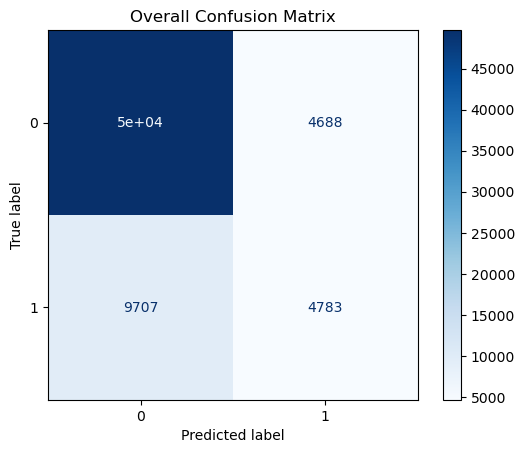

In [89]:
# Display Confusion Matrix
cm = confusion_matrix(y_test_flat, y_pred_flat)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Overall Confusion Matrix')
plt.show()

In [90]:
accuracy = np.trace(cm) / np.sum(cm)
print("Calculated Accuracy:", accuracy)

Calculated Accuracy: 0.7909222948438634


In [91]:
# reshape the arryas
y_pred = y_pred.reshape(4590, 15)
y_test = y_test.reshape(4590, 15)

C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


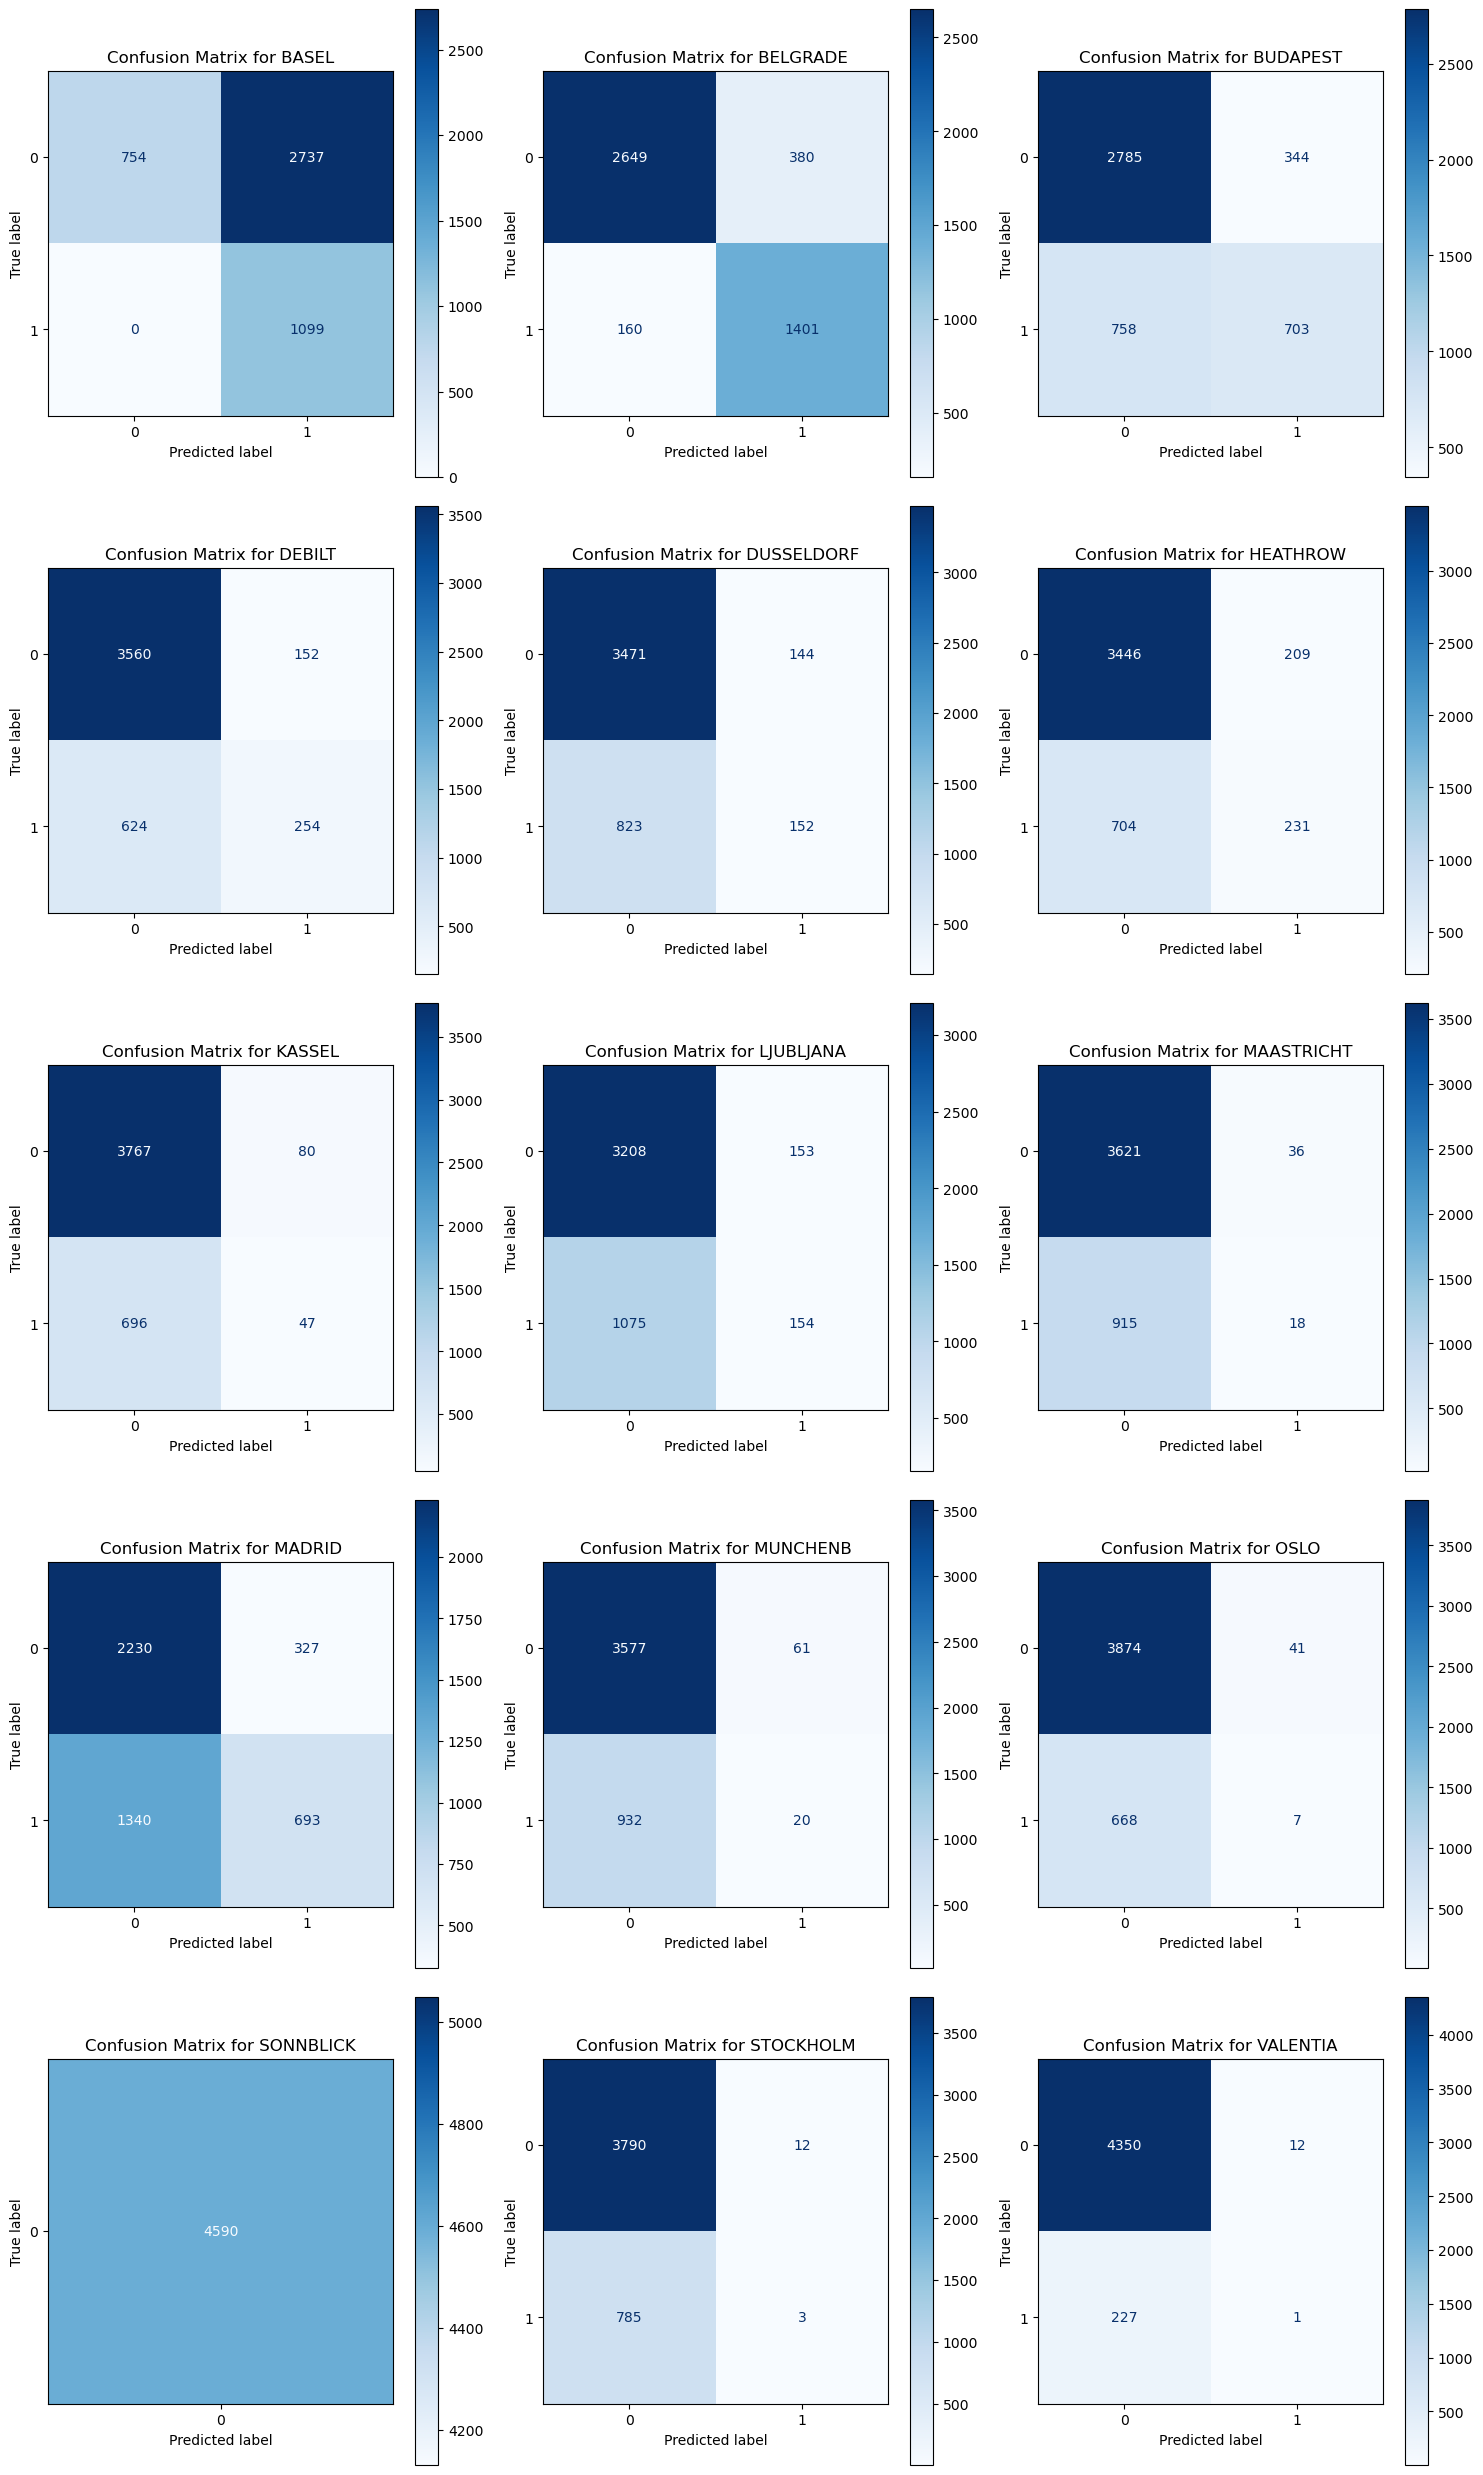

In [92]:
# create confusion matrix for each location
labels = ['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

# Create and plot confusion matrices for each of the 15 binary classifiers
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
axes = axes.flatten()

for i in range(15):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])


    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    
    axes[i].title.set_text(f'Confusion Matrix for {labels[i]}')

plt.tight_layout()
plt.show()
